# **K-Means**
* K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into a pre-defined number of clusters.
* The goal is to group similar data points together and discover underlying patterns or structures within the data.
* It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

### K-Means Workflow:
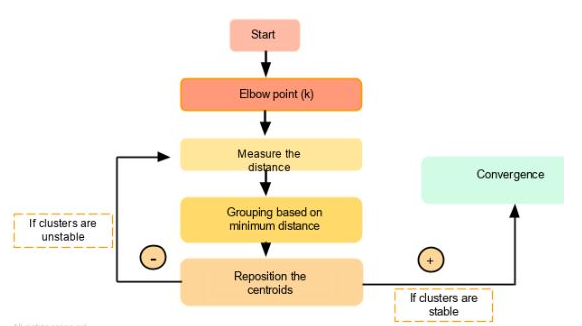

### Mathematical Representation:
- K-Means aims to minimize intra-cluster variance, which is the sum of squared distances between data points and their assigned cluster centroid.
- The objective function of K-Means is:

    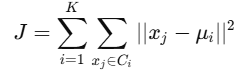

    - Where:
      - 𝐾 = Number of clusters
      - 𝐶𝑖 = Set of points assigned to cluster 
      - 𝜇𝑖 = Centroid of cluster 
      - ∣∣𝑥𝑗 − 𝜇𝑖∣∣^2 = Squared Euclidean distance between point 𝑥𝑗 and centroid 𝜇𝑖

#### Distance Calculation:
- K-Means uses **Euclidean distance** to measure the similarity between a point and a centroid
    
    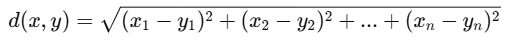

#### Choosing the Optimal Number of Clusters (K):​
1. Elbow Method
- Compute the inertia (sum of squared distances from points to their centroids) for different values of 𝐾.
- Plot the inertia vs. 𝐾 graph.
- The "elbow" point, where the rate of decrease slows down, is the optimal 𝐾.

    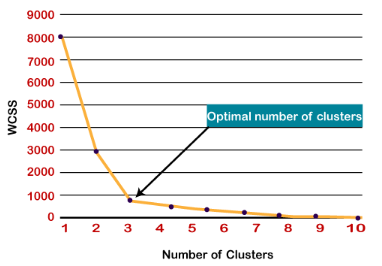


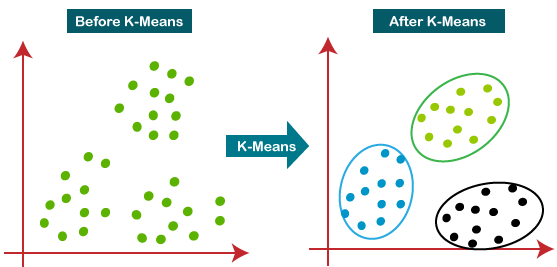

### Implementation of K-means Clustering Algorithm:
1. Data Pre-processing
2. Finding the optimal number of clusters using the elbow method
3. Training the K-means algorithm on the training dataset
4. Visualizing the clusters

In [1]:
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd   
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Load a Dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')  
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
X = dataset.iloc[:, [3, 4]].values

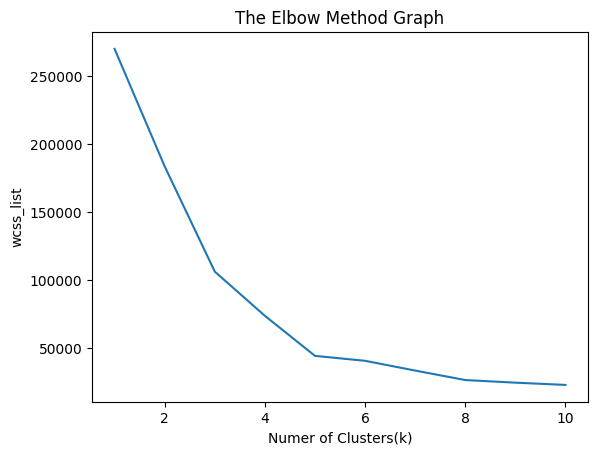

In [4]:
wcss_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Numer of Clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

In [5]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state=42)
y_predict = kmeans.fit_predict(X)

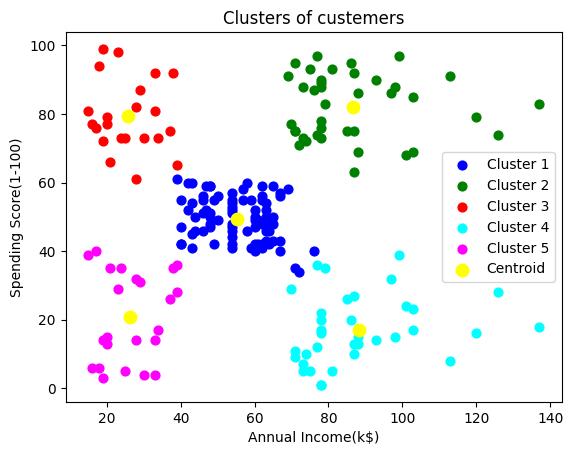

In [6]:
mtp.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 40, c = 'blue', label = 'Cluster 1')
mtp.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 40, c = 'green', label = 'Cluster 2')
mtp.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s = 40, c = 'red', label = 'Cluster 3')
mtp.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s = 40, c = 'cyan', label = 'Cluster 4')
mtp.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s = 40, c = 'magenta', label = 'Cluster 5')
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 80, c = 'yellow', label = 'Centroid')
mtp.title('Clusters of custemers')
mtp.xlabel('Annual Income(k$)')
mtp.ylabel('Spending Score(1-100)')
mtp.legend()
mtp.show()

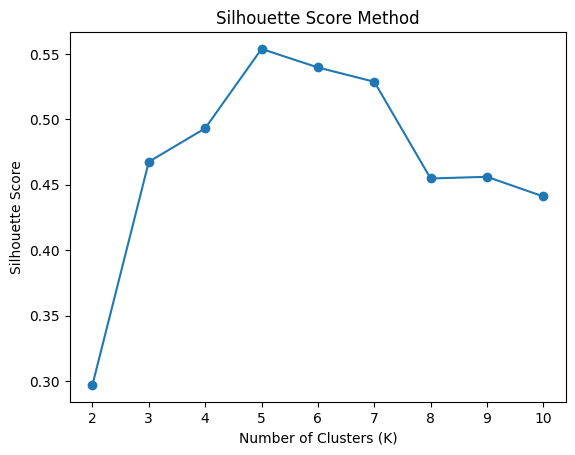

In [7]:
#Silhouette Score
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

mtp.plot(range(2, 11), sil_scores, marker = 'o')
mtp.xlabel("Number of Clusters (K)")
mtp.ylabel("Silhouette Score")
mtp.title("Silhouette Score Method")
mtp.show()